<a href="https://colab.research.google.com/github/omaimajameel11/EduNet_Project/blob/main/AI_Powered_Color_Detection_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your color dataset CSV file:


Saving color_names.csv to color_names.csv

Columns in dataset: Index(['Name', 'Hex (24 bit)', 'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
       'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'],
      dtype='object')
             Name Hex (24 bit)  Red (8 bit)  Green (8 bit)  Blue (8 bit)  \
0   Absolute zero      #0048BA            0             72           186   
1      Acid green      #B0BF1A          176            191            26   
2            Aero      #7CB9E8          124            185           232   
3       Aero blue      #C9FFE5          201            255           229   
4  African violet      #B284BE          178            132           190   

   Hue (degrees)  HSL.S (%)  HSL.L (%), HSV.S (%), HSV.V (%)  
0          217.0      100.0                             37.0  
1           65.0       76.0                             43.0  
2          206.0       70.0                             70.0  
3          151.0      100.0                           

Saving apple_158989157.jpg to apple_158989157.jpg


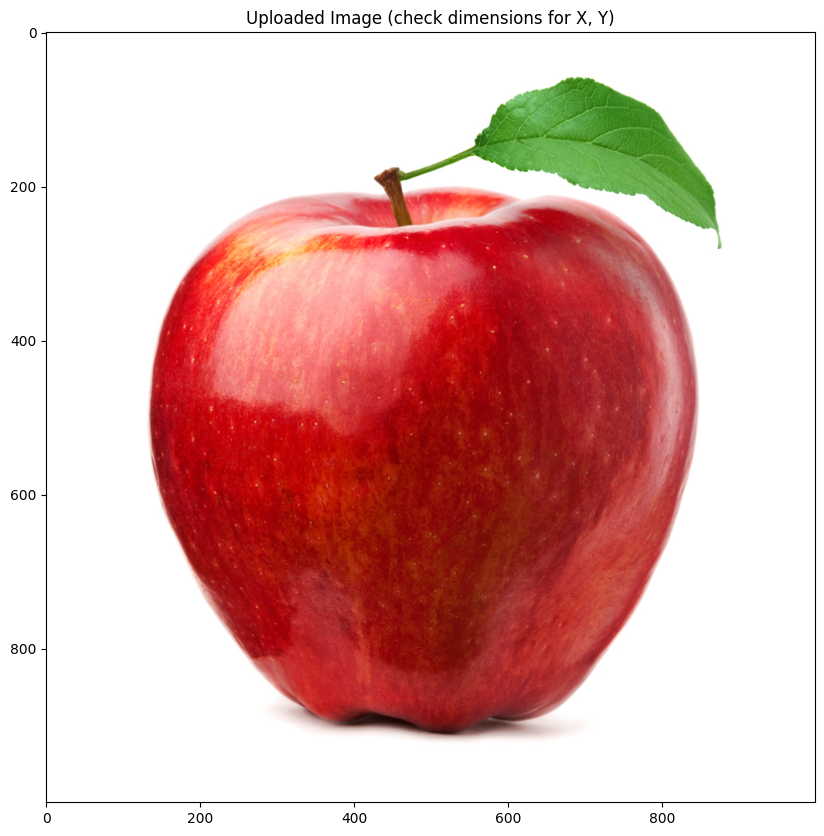

Image shape (height, width, channels): 1000, 998, 3
Enter X coordinate (0 to 997): 500
Enter Y coordinate (0 to 999): 500

Clicked Pixel RGB: (140, 4, 4)
Closest Color Name: Deep Red


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload your color dataset CSV file
print("Upload your color dataset CSV file:")
uploaded_csv = files.upload()
csv_filename = list(uploaded_csv.keys())[0]

# Load dataset
color_data = pd.read_csv(csv_filename)
print("\nColumns in dataset:", color_data.columns)
print(color_data.head())

# Convert RGB tuple to LAB color space using OpenCV
def rgb_to_lab(rgb_tuple):
    rgb = np.uint8([[rgb_tuple]])  # shape (1,1,3)
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
    return lab[0][0]

# Find closest color name based on LAB color distance
def get_closest_color_name_lab(R, G, B):
    min_dist = float('inf')
    closest_color = None
    target_lab = rgb_to_lab((R, G, B))

    for i, row in color_data.iterrows():
        sample_rgb = (row['Red (8 bit)'], row['Green (8 bit)'], row['Blue (8 bit)'])
        sample_lab = rgb_to_lab(sample_rgb)

        dist = np.linalg.norm(target_lab - sample_lab)
        if dist < min_dist:
            min_dist = dist
            closest_color = row['Name']
    return closest_color

# Upload image file
print("\nUpload your image file:")
uploaded_img = files.upload()
img_filename = list(uploaded_img.keys())[0]

# Read and convert image from BGR to RGB
img = cv2.imread(img_filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Uploaded Image (check dimensions for X, Y)")
plt.axis('on')
plt.show()

# Show image shape
h, w, c = img.shape
print(f"Image shape (height, width, channels): {h}, {w}, {c}")

# Get pixel coordinates manually
x = int(input(f"Enter X coordinate (0 to {w-1}): "))
y = int(input(f"Enter Y coordinate (0 to {h-1}): "))

# Get pixel RGB values
pixel = img[y, x]
B, G, R = int(pixel[0]), int(pixel[1]), int(pixel[2])
print(f"\nClicked Pixel RGB: ({R}, {G}, {B})")

# Find and print closest color name
color_name = get_closest_color_name_lab(R, G, B)
print(f"Closest Color Name: {color_name}")
